In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

# Load data from file

In [8]:
merged_data = pd.read_pickle('merged_data_pct_change.pkl')

# Create train data and test data

In [9]:
X = merged_data['rawText']
y = merged_data['1day pct change']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Tf-Idf and DNN model

In [11]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [12]:
tfidf = TfidfVectorizer(max_df=0.3, min_df=300, ngram_range=(1,2), stop_words='english',tokenizer=LemmaTokenizer())

In [13]:
tfidf_vectors = tfidf.fit_transform(X_train).astype(np.float32)

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/english.pickle' not found.  Please
  use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - 'C:\\Users\\neural/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\envs\\tensorflow\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\nltk_data'
    - 'C:\\Users\\neural\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************

In [9]:
dense_tfidf_vectors = tfidf_vectors.toarray()

In [10]:
# define base model
def baseline_model():
    model = Sequential()
    model.add(Dense(100, input_dim=dense_tfidf_vectors.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [11]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=3)

In [21]:
'''
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, dense_tfidf_vectors, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''

'\nkfold = KFold(n_splits=10)\nresults = cross_val_score(estimator, dense_tfidf_vectors, y_train, cv=kfold)\nprint("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))\n'

In [12]:
estimator.fit(dense_tfidf_vectors, y_train)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [13]:
test_vectors = tfidf.transform(X_test).astype(np.float32)

In [14]:
test_vectors = test_vectors.toarray()

In [15]:
y_predicted = estimator.predict(test_vectors)

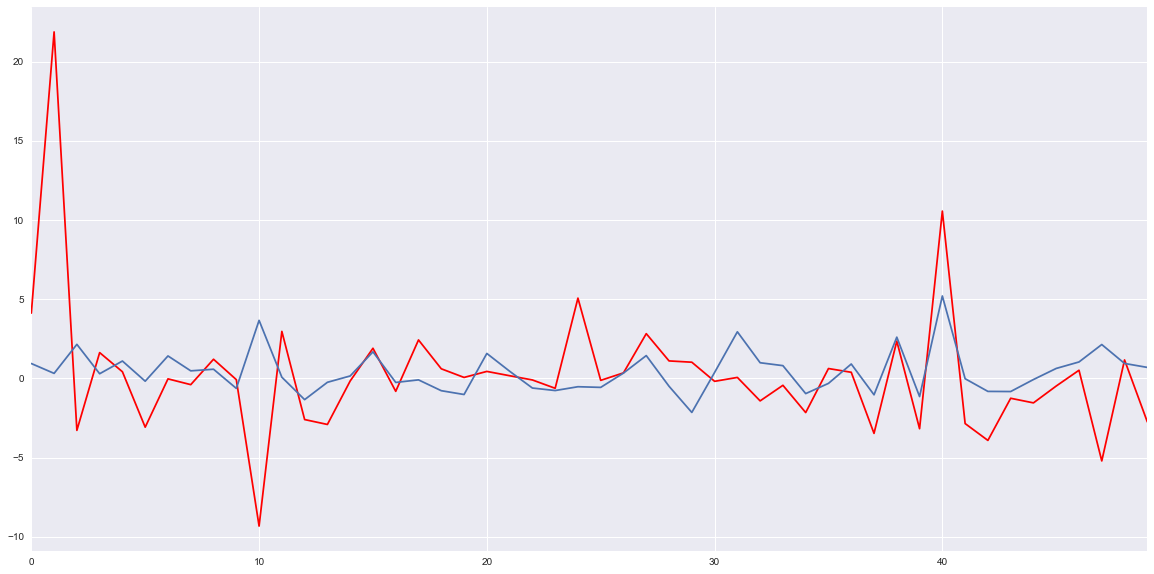

In [16]:
plt.figure(figsize=(20,10))
sns.tsplot(y_test[0:50], color='r')
sns.tsplot(y_predicted[0:50])

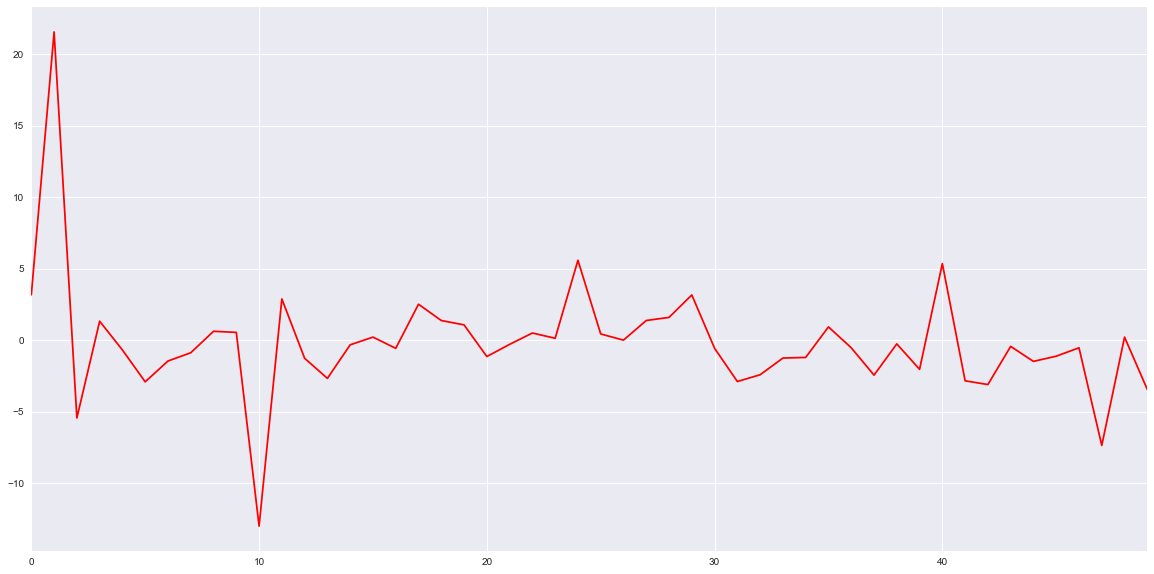

In [17]:
plt.figure(figsize=(20,10))
#sns.tsplot(y_test[0:50])
error = y_test-y_predicted
sns.tsplot(error[0:50], color='r')

In [18]:
error_value = mean_squared_error(y_test, y_predicted)

In [19]:
error_value

9.8423230218405617